<a href="https://colab.research.google.com/github/sergioGarcia91/TRE_NN_MesaLosSantos/blob/main/04_ERT_100NN_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Change letter

In [ ]:
!wget https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf

--2025-01-05 11:41:55--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-01-05 11:41:56--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘Times New Roman.ttf.4’

Times New Roman.ttf 100%[===================>] 814.89K  --.-KB/s    in 0.04s   

2025-01-05 11:41:56 (20.1 MB/s) - ‘Times New Roman.ttf.4’ saved [834452/834452]



In [ ]:
import matplotlib.font_manager as fm

In [ ]:
font_path = 'Times New Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

font_name = font_prop.get_name()
font_name

'Times New Roman'

In [ ]:
plt.rcParams['font.family'] = font_name

# Load data

In [ ]:
path_save_plots = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/Figures/'
path_save_models = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/100NN_models/'
path_data_ert = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/ERT_data/'

In [ ]:
df_ert_01 = pd.read_csv(path_data_ert + 'ERT_01_PotrerosFault.csv', sep=';', decimal=',')
df_ert_02 = pd.read_csv(path_data_ert + 'ERT_02_LaMojarraFault.csv', sep=';', decimal=',')
df_ert_03 = pd.read_csv(path_data_ert + 'ERT_03_LaChivatera_Fault.csv', sep=';', decimal=',')
df_ie_ert = pd.read_csv(path_data_ert + '1erElectrode_ShairetBianyCamiloMariaF.csv', sep=';', decimal=',')

In [ ]:
df_ert_01.head()

,X,Elevation,Resistivity
0,6.262,1648.379,1929.300
1,8.762,1648.381,4391.100
2,11.237,1648.624,293.670
3,13.687,1649.108,3050.300
4,16.162,1649.351,95.234


In [ ]:
df_ert_02.head()

,X,Elevation,Resistivity
0,6.258,1606.388,3028.50
1,8.758,1606.393,665.91
2,11.258,1606.397,423.50
3,13.758,1606.402,1079.50
4,16.258,1606.407,991.12


In [ ]:
df_ert_03.head()

,X,Elevation,Resistivity
0,65.763,1277.052,9.080
1,68.260,1277.167,5.446
2,70.757,1277.292,83.691
3,73.253,1277.425,71.809
4,75.747,1277.585,141.300


In [ ]:
# The ERT contains a location error in the acquisition;
# it only needs an adjustment of subtracting 60 meters.
df_ert_03['X'] = df_ert_03['X'] - 60
df_ert_03.head()

,X,Elevation,Resistivity
0,5.763,1277.052,9.080
1,8.260,1277.167,5.446
2,10.757,1277.292,83.691
3,13.253,1277.425,71.809
4,15.747,1277.585,141.300


In [ ]:
df_ie_ert

,ERT,Strike,Coor X epsg3116,Coor Y epsg3116,Line longitude [m],Author
0,ERT_01_PotrerosFault,140,1109615.565,1246761.308,315,Vergel_Remolina_2023
1,ERT_02_LaMojarraFault,122,1109714.101,1241140.375,155,ArizaDaza_GomezAcuña_2023
2,ERT_03_LaChivatera_Fault,290,1105977.149,1239847.407,195,ArizaDaza_GomezAcuña_2023


# Functions

In [ ]:
def rotation_points(x, y, theta):
  # Convert deghrees to radians
  theta = np.deg2rad(theta)

  # Rotate the points
  x2 = x * np.cos(theta) - y * np.sin(theta)
  y2 = x * np.sin(theta) + y * np.cos(theta)

  return x2, y2

def strike_to_angle(strike):
  angle_theta = 90 - strike
  if angle_theta < 0:
    angle_theta += 360
  elif angle_theta > 360:
    angle_theta -= 360
  return angle_theta

def traslate_points(x, y, new_x, new_y):
  x2 = x + new_x
  y2 = y + new_y
  return x2, y2

## Testing the Functions

In [ ]:
x = np.arange(0, 201, 10)
y = np.ones(x.shape)
df = pd.DataFrame({'x': x, 'y': y})
df['c'] = 'b'
df['c'][x < 100] = 'r'

df

<ipython-input-266-0f5fbaed9e0e>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['c'][x < 100] = 'r'
<ipython-input-266-0f5fbaed9e0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

,x,y,c
0,0,1.0,r
1,10,1.0,r
2,20,1.0,r
3,30,1.0,r
4,40,1.0,r
5,50,1.0,r
6,60,1.0,r
7,70,1.0,r
8,80,1.0,r
9,90,1.0,r


New angle: 265


    x    y  c    x2     y2      x3     y3
0   0  1.0  r  1.00  -0.09  101.00  99.91
1  10  1.0  r  0.12 -10.05  100.12  89.95
2  20  1.0  r -0.75 -20.01   99.25  79.99
3  30  1.0  r -1.62 -29.97   98.38  70.03
4  40  1.0  r -2.49 -39.93   97.51  60.07


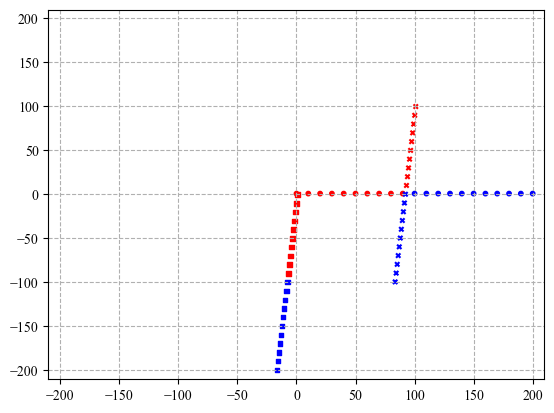

In [ ]:
strike_angle = -175
strike_angle = strike_to_angle(strike_angle)

print(f'New angle: {strike_angle}')
print('\n')

df['x2'], df['y2'] = rotation_points(df['x'], df['y'], strike_angle)

df['x3'], df['y3'] = traslate_points(df['x2'], df['y2'], 100, 100)

print(df.head().round(2))

plt.figure()

plt.scatter(df['x'], df['y'], c=df['c'], marker='o', s=10)
plt.scatter(df['x2'], df['y2'], c=df['c'], marker='s', s=10)
plt.scatter(df['x3'], df['y3'], c=df['c'], marker='x', s=10)

plt.xlim(-210, 210)
plt.ylim(-210, 210)

plt.grid(ls='--')

plt.show()

# Rotating and Locating ERT

In [ ]:
df_ie_ert

,ERT,Strike,Coor X epsg3116,Coor Y epsg3116,Line longitude [m],Author
0,ERT_01_PotrerosFault,140,1109615.565,1246761.308,315,Vergel_Remolina_2023
1,ERT_02_LaMojarraFault,122,1109714.101,1241140.375,155,ArizaDaza_GomezAcuña_2023
2,ERT_03_LaChivatera_Fault,290,1105977.149,1239847.407,195,ArizaDaza_GomezAcuña_2023


## ERT 01

140
310


<ipython-input-269-717d9ee70c53>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ert_01['c'][df_ert_01['X'] < 150] = 'r'
<ipython-input-269-717d9ee70c53>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

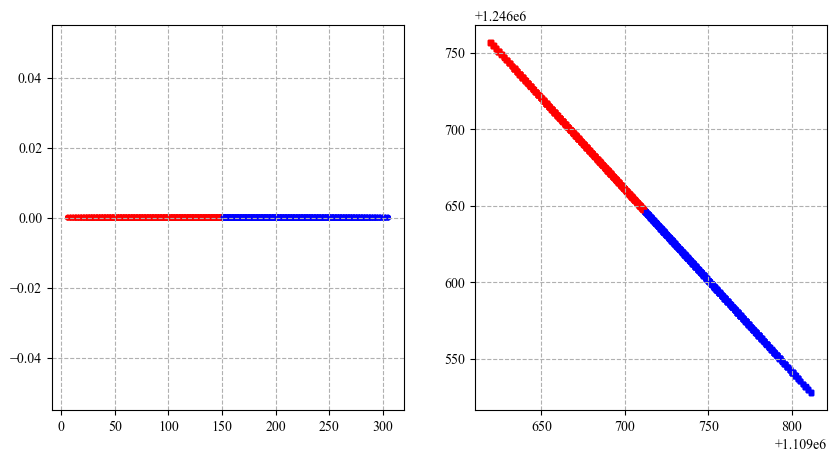

,X,Elevation,Resistivity,Y,new_X,new_Y,c
0,6.262,1648.379,1929.300,0.0,1.109620e+06,1.246757e+06,r
1,8.762,1648.381,4391.100,0.0,1.109621e+06,1.246755e+06,r
2,11.237,1648.624,293.670,0.0,1.109623e+06,1.246753e+06,r
3,13.687,1649.108,3050.300,0.0,1.109624e+06,1.246751e+06,r
4,16.162,1649.351,95.234,0.0,1.109626e+06,1.246749e+06,r


In [ ]:
## ERT 01
strike_angle = df_ie_ert['Strike'][0]
print(strike_angle)
strike_angle = strike_to_angle(strike_angle)
print(strike_angle)

new_X = df_ie_ert['Coor X epsg3116'][0]
new_Y = df_ie_ert['Coor Y epsg3116'][0]

df_ert_01['Y'] = np.zeros(df_ert_01.shape[0])

df_ert_01['new_X'], df_ert_01['new_Y'] = rotation_points(df_ert_01['X'], df_ert_01['Y'], strike_angle)
df_ert_01['new_X'], df_ert_01['new_Y'] = traslate_points(df_ert_01['new_X'], df_ert_01['new_Y'], new_X, new_Y)

df_ert_01['c'] = 'b'
df_ert_01['c'][df_ert_01['X'] < 150] = 'r'

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(df_ert_01['X'], df_ert_01['Y'], c=df_ert_01['c'], marker='o', s=10)
axs[1].scatter(df_ert_01['new_X'], df_ert_01['new_Y'], c=df_ert_01['c'], marker='s', s=10)

axs[0].grid(ls='--')
axs[1].grid(ls='--')

plt.show()

df_ert_01.head()

## ERT 02

In [ ]:
df_ie_ert

,ERT,Strike,Coor X epsg3116,Coor Y epsg3116,Line longitude [m],Author
0,ERT_01_PotrerosFault,140,1109615.565,1246761.308,315,Vergel_Remolina_2023
1,ERT_02_LaMojarraFault,122,1109714.101,1241140.375,155,ArizaDaza_GomezAcuña_2023
2,ERT_03_LaChivatera_Fault,290,1105977.149,1239847.407,195,ArizaDaza_GomezAcuña_2023


122
328


<ipython-input-271-e898e9651699>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ert_02['c'][df_ert_02['X'] < 75] = 'r'
<ipython-input-271-e898e9651699>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

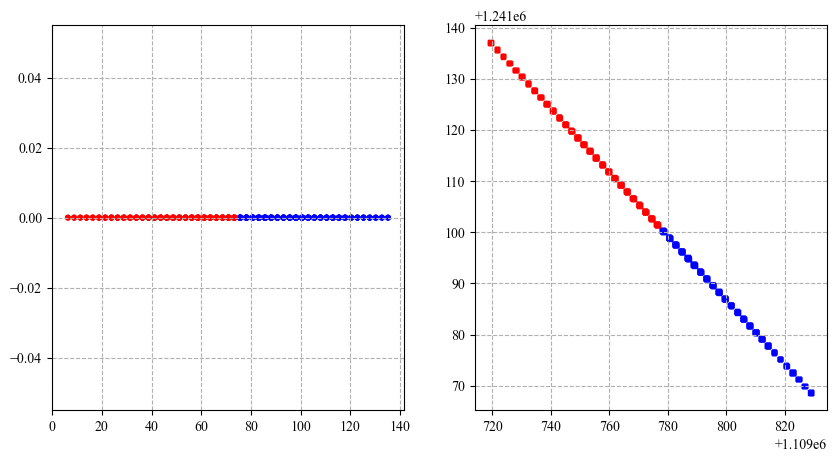

,X,Elevation,Resistivity,Y,new_X,new_Y,c
0,6.258,1606.388,3028.50,0.0,1.109719e+06,1.241137e+06,r
1,8.758,1606.393,665.91,0.0,1.109722e+06,1.241136e+06,r
2,11.258,1606.397,423.50,0.0,1.109724e+06,1.241134e+06,r
3,13.758,1606.402,1079.50,0.0,1.109726e+06,1.241133e+06,r
4,16.258,1606.407,991.12,0.0,1.109728e+06,1.241132e+06,r


In [ ]:
## ERT 02
strike_angle = df_ie_ert['Strike'][1]
print(strike_angle)
strike_angle = strike_to_angle(strike_angle)
print(strike_angle)

new_X = df_ie_ert['Coor X epsg3116'][1]
new_Y = df_ie_ert['Coor Y epsg3116'][1]

df_ert_02['Y'] = np.zeros(df_ert_02.shape[0])

df_ert_02['new_X'], df_ert_02['new_Y'] = rotation_points(df_ert_02['X'], df_ert_02['Y'], strike_angle)
df_ert_02['new_X'], df_ert_02['new_Y'] = traslate_points(df_ert_02['new_X'], df_ert_02['new_Y'], new_X, new_Y)

df_ert_02['c'] = 'b'
df_ert_02['c'][df_ert_02['X'] < 75] = 'r'

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(df_ert_02['X'], df_ert_02['Y'], c=df_ert_02['c'], marker='o', s=10)
axs[1].scatter(df_ert_02['new_X'], df_ert_02['new_Y'], c=df_ert_02['c'], marker='s', s=10)

axs[0].grid(ls='--')
axs[1].grid(ls='--')

plt.show()

df_ert_02.head()

## ERT 03

In [ ]:
df_ie_ert

,ERT,Strike,Coor X epsg3116,Coor Y epsg3116,Line longitude [m],Author
0,ERT_01_PotrerosFault,140,1109615.565,1246761.308,315,Vergel_Remolina_2023
1,ERT_02_LaMojarraFault,122,1109714.101,1241140.375,155,ArizaDaza_GomezAcuña_2023
2,ERT_03_LaChivatera_Fault,290,1105977.149,1239847.407,195,ArizaDaza_GomezAcuña_2023


290
160


<ipython-input-273-d4bdb082dee7>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ert_03['c'][df_ert_03['X'] < 100] = 'r'
<ipython-input-273-d4bdb082dee7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

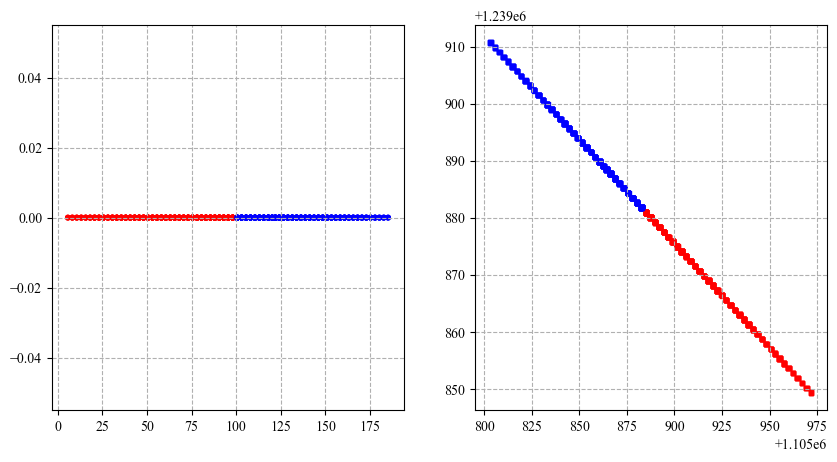

,X,Elevation,Resistivity,Y,new_X,new_Y,c
0,5.763,1277.052,9.080,0.0,1.105972e+06,1.239849e+06,r
1,8.260,1277.167,5.446,0.0,1.105969e+06,1.239850e+06,r
2,10.757,1277.292,83.691,0.0,1.105967e+06,1.239851e+06,r
3,13.253,1277.425,71.809,0.0,1.105965e+06,1.239852e+06,r
4,15.747,1277.585,141.300,0.0,1.105962e+06,1.239853e+06,r


In [ ]:
## ERT 03
strike_angle = df_ie_ert['Strike'][2]
print(strike_angle)
strike_angle = strike_to_angle(strike_angle)
print(strike_angle)

new_X = df_ie_ert['Coor X epsg3116'][2]
new_Y = df_ie_ert['Coor Y epsg3116'][2]

df_ert_03['Y'] = np.zeros(df_ert_03.shape[0])

df_ert_03['new_X'], df_ert_03['new_Y'] = rotation_points(df_ert_03['X'], df_ert_03['Y'], strike_angle)
df_ert_03['new_X'], df_ert_03['new_Y'] = traslate_points(df_ert_03['new_X'], df_ert_03['new_Y'], new_X, new_Y)

df_ert_03['c'] = 'b'
df_ert_03['c'][df_ert_03['X'] < 100] = 'r'

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(df_ert_03['X'], df_ert_03['Y'], c=df_ert_03['c'], marker='o', s=10)
axs[1].scatter(df_ert_03['new_X'], df_ert_03['new_Y'], c=df_ert_03['c'], marker='s', s=10)

axs[0].grid(ls='--')
axs[1].grid(ls='--')

plt.show()

df_ert_03.head()

# Predict with 100 models

In [ ]:
models_list = os.listdir(path_save_models)
models_list = [model for model in models_list if model.endswith('.pkl')]


## ERT 01

In [ ]:
df = df_ert_01[['new_X', 'new_Y', 'Elevation', 'Resistivity']].copy()
X_100models = df.copy()

X_100models['Resistivity'] = np.log10(X_100models['Resistivity'])

X_100models['new_X'] = (X_100models['new_X'] - 1096700) / (1120100 - 1096700)
X_100models['new_Y'] = (X_100models['new_Y'] - 1235500) / (1260100 - 1235500)
X_100models['Elevation'] = (X_100models['Elevation'] - (500)) / (1830 - (500))
X_100models['Resistivity'] = (X_100models['Resistivity'] - (1)) / (5 - (1))

dummiesCol = ['_arenisca', '_arenisca calcarea',
              '_biomicrita','_caliza',
              '_conglomerado', '_esquisto',
              '_granito','_lodo calcareo',
              '_lodolita', '_metaarenisca']
for col in dummiesCol:
  X_100models[col] = 0

X_100models['_arenisca'] = 1

X_100models = X_100models.to_numpy()

df_100models = pd.DataFrame()

for model in models_list:
  nn_model = model[6:12]
  model = joblib.load(path_save_models + model)
  df_100models[nn_model] = np.round(model.predict(X_100models), 2)

df_100models.head()

,NN_001,NN_002,NN_003,NN_004,NN_005,NN_006,NN_007,NN_008,NN_009,NN_010,...,NN_091,NN_092,NN_093,NN_094,NN_095,NN_096,NN_097,NN_098,NN_099,NN_100
0,8.14,4.40,5.15,6.71,5.65,4.42,4.43,5.30,4.49,5.57,...,6.77,6.08,5.90,6.68,5.05,5.90,3.96,6.72,5.76,4.89
1,7.01,2.82,5.09,6.80,5.69,3.55,3.13,2.90,4.30,4.59,...,7.82,5.18,5.43,5.07,4.68,5.42,3.81,5.01,5.80,4.94
2,11.21,9.53,10.79,6.50,9.45,8.12,8.96,7.41,8.49,8.39,...,7.68,7.55,6.96,10.02,6.46,6.99,8.25,9.69,9.10,6.86
3,7.51,3.33,5.20,6.76,5.63,3.78,3.17,3.97,4.22,5.00,...,7.35,5.58,5.64,5.62,4.53,5.63,3.66,5.95,5.70,4.84
4,10.30,9.59,16.84,6.37,11.58,10.61,12.63,8.00,10.06,10.08,...,16.03,6.80,8.25,12.02,7.11,9.15,11.21,11.45,16.23,16.47


In [ ]:
df_ert_01['Mean 100models Poro'] = df_100models.mean(axis=1)
df_ert_01['Std 100models Poro'] = df_100models.std(axis=1)

df_ert_01.head()

,X,Elevation,Resistivity,Y,new_X,new_Y,c,Mean 100models Poro,Std 100models Poro
0,6.262,1648.379,1929.300,0.0,1.109620e+06,1.246757e+06,r,5.2198,1.058206
1,8.762,1648.381,4391.100,0.0,1.109621e+06,1.246755e+06,r,4.6025,1.467205
2,11.237,1648.624,293.670,0.0,1.109623e+06,1.246753e+06,r,8.4420,1.325715
3,13.687,1649.108,3050.300,0.0,1.109624e+06,1.246751e+06,r,4.7856,1.275779
4,16.162,1649.351,95.234,0.0,1.109626e+06,1.246749e+06,r,11.5991,2.974507


## ERT 02

In [ ]:
df = df_ert_02[['new_X', 'new_Y', 'Elevation', 'Resistivity']].copy()
X_100models = df.copy()

X_100models['Resistivity'] = np.log10(X_100models['Resistivity'])

X_100models['new_X'] = (X_100models['new_X'] - 1096700) / (1120100 - 1096700)
X_100models['new_Y'] = (X_100models['new_Y'] - 1235500) / (1260100 - 1235500)
X_100models['Elevation'] = (X_100models['Elevation'] - (500)) / (1830 - (500))
X_100models['Resistivity'] = (X_100models['Resistivity'] - (1)) / (5 - (1))

dummiesCol = ['_arenisca', '_arenisca calcarea',
              '_biomicrita','_caliza',
              '_conglomerado', '_esquisto',
              '_granito','_lodo calcareo',
              '_lodolita', '_metaarenisca']
for col in dummiesCol:
  X_100models[col] = 0

X_100models['_arenisca'] = 1

X_100models = X_100models.to_numpy()

df_100models = pd.DataFrame()

for model in models_list:
  nn_model = model[6:12]
  model = joblib.load(path_save_models + model)
  df_100models[nn_model] = np.round(model.predict(X_100models), 2)

df_100models.head()

,NN_001,NN_002,NN_003,NN_004,NN_005,NN_006,NN_007,NN_008,NN_009,NN_010,...,NN_091,NN_092,NN_093,NN_094,NN_095,NN_096,NN_097,NN_098,NN_099,NN_100
0,3.48,3.41,7.33,5.68,4.97,3.36,2.93,3.17,3.35,1.32,...,3.98,5.78,3.73,2.15,4.29,2.08,2.96,3.57,4.34,4.42
1,2.89,2.91,6.03,5.69,5.06,4.65,3.10,6.55,7.10,3.33,...,7.73,7.31,4.02,3.80,5.39,4.30,7.51,3.99,4.47,4.18
2,2.71,2.76,5.65,5.70,4.96,5.22,4.03,6.61,7.07,4.08,...,7.01,7.01,4.11,4.81,5.78,4.64,10.15,4.07,4.68,4.26
3,3.08,3.07,6.45,5.69,5.12,4.04,3.04,5.90,6.19,2.54,...,7.93,7.31,3.93,2.73,4.97,2.54,4.69,3.91,4.23,4.10
4,3.04,3.04,6.38,5.68,5.13,4.15,3.05,6.28,6.52,2.66,...,8.35,7.40,3.95,2.92,5.05,2.84,5.19,3.93,4.28,4.11


In [ ]:
df_ert_02['Mean 100models Poro'] = df_100models.mean(axis=1)
df_ert_02['Std 100models Poro'] = df_100models.std(axis=1)

df_ert_02.head()

,X,Elevation,Resistivity,Y,new_X,new_Y,c,Mean 100models Poro,Std 100models Poro
0,6.258,1606.388,3028.50,0.0,1.109719e+06,1.241137e+06,r,3.6379,1.930261
1,8.758,1606.393,665.91,0.0,1.109722e+06,1.241136e+06,r,4.8239,1.550619
2,11.258,1606.397,423.50,0.0,1.109724e+06,1.241134e+06,r,5.2426,1.702603
3,13.758,1606.402,1079.50,0.0,1.109726e+06,1.241133e+06,r,4.3249,1.641787
4,16.258,1606.407,991.12,0.0,1.109728e+06,1.241132e+06,r,4.4188,1.628446


## ERT 03

In [ ]:
df = df_ert_03[['new_X', 'new_Y', 'Elevation', 'Resistivity']].copy()
X_100models = df.copy()

X_100models['Resistivity'] = np.log10(X_100models['Resistivity'])

X_100models['new_X'] = (X_100models['new_X'] - 1096700) / (1120100 - 1096700)
X_100models['new_Y'] = (X_100models['new_Y'] - 1235500) / (1260100 - 1235500)
X_100models['Elevation'] = (X_100models['Elevation'] - (500)) / (1830 - (500))
X_100models['Resistivity'] = (X_100models['Resistivity'] - (1)) / (5 - (1))

dummiesCol = ['_arenisca', '_arenisca calcarea',
              '_biomicrita','_caliza',
              '_conglomerado', '_esquisto',
              '_granito','_lodo calcareo',
              '_lodolita', '_metaarenisca']
for col in dummiesCol:
  X_100models[col] = 0

X_100models['_caliza'] = 1

X_100models = X_100models.to_numpy()

df_100models = pd.DataFrame()

for model in models_list:
  nn_model = model[6:12]
  model = joblib.load(path_save_models + model)
  df_100models[nn_model] = np.round(model.predict(X_100models), 2)

df_100models.head()

,NN_001,NN_002,NN_003,NN_004,NN_005,NN_006,NN_007,NN_008,NN_009,NN_010,...,NN_091,NN_092,NN_093,NN_094,NN_095,NN_096,NN_097,NN_098,NN_099,NN_100
0,3.19,0.11,25.01,12.10,12.05,-0.09,0.10,12.55,21.00,6.53,...,23.45,8.98,26.62,2.28,10.99,0.09,18.09,-0.10,10.42,24.41
1,3.27,0.11,32.62,12.15,12.89,-0.09,0.06,13.02,22.36,6.89,...,26.34,10.17,31.32,2.29,12.25,-0.28,21.14,-0.01,12.04,27.33
2,2.44,0.30,2.75,3.66,6.26,2.46,2.20,-0.71,11.61,4.96,...,1.04,2.09,4.56,3.78,5.13,6.78,4.30,0.75,4.74,7.15
3,2.50,0.27,2.18,3.88,6.83,2.24,1.92,-0.14,14.13,5.05,...,1.72,2.73,4.95,3.68,5.54,7.07,5.20,0.46,4.92,7.62
4,2.24,0.43,2.70,2.92,4.33,3.21,2.29,-0.71,2.87,4.59,...,1.04,1.22,3.22,3.88,3.36,5.68,0.87,1.84,4.11,5.57


In [ ]:
df_ert_03['Mean 100models Poro'] = df_100models.mean(axis=1)
df_ert_03['Std 100models Poro'] = df_100models.std(axis=1)

df_ert_03.head()

,X,Elevation,Resistivity,Y,new_X,new_Y,c,Mean 100models Poro,Std 100models Poro
0,5.763,1277.052,9.080,0.0,1.105972e+06,1.239849e+06,r,9.2686,8.596868
1,8.260,1277.167,5.446,0.0,1.105969e+06,1.239850e+06,r,10.1275,10.078844
2,10.757,1277.292,83.691,0.0,1.105967e+06,1.239851e+06,r,3.5689,2.400446
3,13.253,1277.425,71.809,0.0,1.105965e+06,1.239852e+06,r,3.8370,2.713636
4,15.747,1277.585,141.300,0.0,1.105962e+06,1.239853e+06,r,2.7889,1.542035


# Predict with thesis models

In [ ]:
!wget https://github.com/sergioGarcia91/AplicativoMesaLosSantos/raw/refs/heads/main/modelosNN/porosidadNNrelu_hl25_8_5Sc32.pkl

--2025-01-05 11:42:04--  https://github.com/sergioGarcia91/AplicativoMesaLosSantos/raw/refs/heads/main/modelosNN/porosidadNNrelu_hl25_8_5Sc32.pkl
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sergioGarcia91/AplicativoMesaLosSantos/refs/heads/main/modelosNN/porosidadNNrelu_hl25_8_5Sc32.pkl [following]
--2025-01-05 11:42:04--  https://raw.githubusercontent.com/sergioGarcia91/AplicativoMesaLosSantos/refs/heads/main/modelosNN/porosidadNNrelu_hl25_8_5Sc32.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7545 (7.4K) [application/octet-stream]
Saving to: ‘porosidadNNrelu_hl25_8_5Sc32.pkl.2’

poros

In [ ]:
!wget https://github.com/sergioGarcia91/AplicativoMesaLosSantos/raw/refs/heads/main/modelosNN/rhoWetNNrelu_hl10_6_5Sc33.pkl

--2025-01-05 11:42:05--  https://github.com/sergioGarcia91/AplicativoMesaLosSantos/raw/refs/heads/main/modelosNN/rhoWetNNrelu_hl10_6_5Sc33.pkl
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sergioGarcia91/AplicativoMesaLosSantos/refs/heads/main/modelosNN/rhoWetNNrelu_hl10_6_5Sc33.pkl [following]
--2025-01-05 11:42:05--  https://raw.githubusercontent.com/sergioGarcia91/AplicativoMesaLosSantos/refs/heads/main/modelosNN/rhoWetNNrelu_hl10_6_5Sc33.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5595 (5.5K) [application/octet-stream]
Saving to: ‘rhoWetNNrelu_hl10_6_5Sc33.pkl.2’

rhoWetNNrelu_hl10

In [ ]:
model_thesis_poro = 'porosidadNNrelu_hl25_8_5Sc32.pkl'
model_thesis_poro = joblib.load(model_thesis_poro)

model_thesis_poro

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 0.22.2.post1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


MLPRegressor(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(25, 8, 5),
             max_iter=6000, solver='lbfgs', verbose=True)

In [ ]:
model_thesis_rho = 'rhoWetNNrelu_hl10_6_5Sc33.pkl'
model_thesis_rho = joblib.load(model_thesis_rho)

model_thesis_rho

MLPRegressor(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(10, 6, 5),
             max_iter=6000, solver='lbfgs', verbose=True)

- 'K1t':8,
- 'K1p':7,
- 'K1r':6,
- 'K1ls_ms':5,
- 'K1ls_mm':4,
- 'K1ls_mi':3,
- 'J1-2j':2,
- 'J1gp':1,
- 'Oss':0

In [ ]:
df_faults = pd.read_csv('/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/puntosSobreFallas2.csv',
                      delimiter=';',decimal=',')
df_faults.head()

,fid,DEM_mesa_r,CoorX,CoorY
0,1,1681.0,1108269.627,1245139.357
1,2,1681.0,1108268.806,1245138.785
2,3,1681.0,1108267.986,1245138.212
3,4,1681.0,1108267.166,1245137.640
4,5,1681.0,1108266.346,1245137.068


## ERT 01

In [ ]:
df = df_ert_01[['new_X', 'new_Y', 'Elevation']].copy()
X_tesis = df.copy()

X_tesis['Distancia Falla [m]'] = np.zeros(X_tesis.shape[0])
dist_list = []

for x_ert, y_ert in zip(df_ert_01['new_X'], df_ert_01['new_Y']):
  distancias = np.sqrt((df_faults['CoorX'] - x_ert)**2 + (df_faults['CoorY'] - y_ert)**2)
  dist_list.append(distancias.min())

X_tesis['Distancia Falla [m]'] = dist_list
X_tesis['GeoNN'] = 5 # K1ls_ms


X_tesis['Xn'] = (X_tesis['new_X'] - 1096700) / (1120100 - 1096700)
X_tesis['Yn'] = (X_tesis['new_Y'] - 1235500) / (1260100 - 1235500)
X_tesis['Zn'] = (X_tesis['Elevation'] - (-150)) / (1830 - (-150))
X_tesis['DFn'] = (X_tesis['Distancia Falla [m]'] - (000)) / (3000 - (000))

X_tesis = X_tesis[['Xn', 'Yn', 'Zn', 'DFn', 'GeoNN']].copy()

X_tesis = X_tesis.to_numpy()

df_ert_01['Resistivity NN Thesis'] = 10 ** (model_thesis_rho.predict(X_tesis))
df_ert_01['Porosity NN Thesis'] =model_thesis_poro.predict(X_tesis)

df_ert_01.head()

,X,Elevation,Resistivity,Y,new_X,new_Y,c,Mean 100models Poro,Std 100models Poro,Resistivity NN Thesis,Porosity NN Thesis
0,6.262,1648.379,1929.300,0.0,1.109620e+06,1.246757e+06,r,5.2198,1.058206,615.777108,6.167169
1,8.762,1648.381,4391.100,0.0,1.109621e+06,1.246755e+06,r,4.6025,1.467205,617.294021,6.162490
2,11.237,1648.624,293.670,0.0,1.109623e+06,1.246753e+06,r,8.4420,1.325715,618.908105,6.159882
3,13.687,1649.108,3050.300,0.0,1.109624e+06,1.246751e+06,r,4.7856,1.275779,620.618664,6.159348
4,16.162,1649.351,95.234,0.0,1.109626e+06,1.246749e+06,r,11.5991,2.974507,622.241422,6.156740


## ERT 02

In [ ]:
df = df_ert_02[['new_X', 'new_Y', 'Elevation']].copy()
X_tesis = df.copy()

X_tesis['Distancia Falla [m]'] = np.zeros(X_tesis.shape[0])
dist_list = []

for x_ert, y_ert in zip(df_ert_02['new_X'], df_ert_02['new_Y']):
  distancias = np.sqrt((df_faults['CoorX'] - x_ert)**2 + (df_faults['CoorY'] - y_ert)**2)
  dist_list.append(distancias.min())

X_tesis['Distancia Falla [m]'] = dist_list
X_tesis['GeoNN'] = 5 # K1ls_ms


X_tesis['Xn'] = (X_tesis['new_X'] - 1096700) / (1120100 - 1096700)
X_tesis['Yn'] = (X_tesis['new_Y'] - 1235500) / (1260100 - 1235500)
X_tesis['Zn'] = (X_tesis['Elevation'] - (-150)) / (1830 - (-150))
X_tesis['DFn'] = (X_tesis['Distancia Falla [m]'] - (000)) / (3000 - (000))

X_tesis = X_tesis[['Xn', 'Yn', 'Zn', 'DFn', 'GeoNN']].copy()

X_tesis = X_tesis.to_numpy()

df_ert_02['Resistivity NN Thesis'] = 10 ** (model_thesis_rho.predict(X_tesis))
df_ert_02['Porosity NN Thesis'] =model_thesis_poro.predict(X_tesis)

df_ert_02.head()

,X,Elevation,Resistivity,Y,new_X,new_Y,c,Mean 100models Poro,Std 100models Poro,Resistivity NN Thesis,Porosity NN Thesis
0,6.258,1606.388,3028.50,0.0,1.109719e+06,1.241137e+06,r,3.6379,1.930261,767.372912,3.620490
1,8.758,1606.393,665.91,0.0,1.109722e+06,1.241136e+06,r,4.8239,1.550619,766.627415,3.625126
2,11.258,1606.397,423.50,0.0,1.109724e+06,1.241134e+06,r,5.2426,1.702603,765.881686,3.629754
3,13.758,1606.402,1079.50,0.0,1.109726e+06,1.241133e+06,r,4.3249,1.641787,765.137635,3.634390
4,16.258,1606.407,991.12,0.0,1.109728e+06,1.241132e+06,r,4.4188,1.628446,764.394306,3.639026


## ERT 03

In [ ]:
df = df_ert_03[['new_X', 'new_Y', 'Elevation']].copy()
X_tesis = df.copy()

X_tesis['Distancia Falla [m]'] = np.zeros(X_tesis.shape[0])
dist_list = []

for x_ert, y_ert in zip(df_ert_03['new_X'], df_ert_03['new_Y']):
  distancias = np.sqrt((df_faults['CoorX'] - x_ert)**2 + (df_faults['CoorY'] - y_ert)**2)
  dist_list.append(distancias.min())

X_tesis['Distancia Falla [m]'] = dist_list
X_tesis['GeoNN'] = 6 # K1r


X_tesis['Xn'] = (X_tesis['new_X'] - 1096700) / (1120100 - 1096700)
X_tesis['Yn'] = (X_tesis['new_Y'] - 1235500) / (1260100 - 1235500)
X_tesis['Zn'] = (X_tesis['Elevation'] - (-150)) / (1830 - (-150))
X_tesis['DFn'] = (X_tesis['Distancia Falla [m]'] - (000)) / (3000 - (000))

X_tesis = X_tesis[['Xn', 'Yn', 'Zn', 'DFn', 'GeoNN']].copy()

X_tesis = X_tesis.to_numpy()

df_ert_03['Resistivity NN Thesis'] = 10 ** (model_thesis_rho.predict(X_tesis))
df_ert_03['Porosity NN Thesis'] =model_thesis_poro.predict(X_tesis)

df_ert_03.head()

,X,Elevation,Resistivity,Y,new_X,new_Y,c,Mean 100models Poro,Std 100models Poro,Resistivity NN Thesis,Porosity NN Thesis
0,5.763,1277.052,9.080,0.0,1.105972e+06,1.239849e+06,r,9.2686,8.596868,1008.715593,1.474544
1,8.260,1277.167,5.446,0.0,1.105969e+06,1.239850e+06,r,10.1275,10.078844,1008.966489,1.473682
2,10.757,1277.292,83.691,0.0,1.105967e+06,1.239851e+06,r,3.5689,2.400446,1009.220376,1.472759
3,13.253,1277.425,71.809,0.0,1.105965e+06,1.239852e+06,r,3.8370,2.713636,1009.476024,1.471788
4,15.747,1277.585,141.300,0.0,1.105962e+06,1.239853e+06,r,2.7889,1.542035,1009.739408,1.470654


# Save CSV

In [ ]:
df_ert_01.round(3).to_csv(path_data_ert + 'df_ert_01_.csv',
                          sep=';',
                          decimal=',',
                          index=False)

df_ert_02.round(3).to_csv(path_data_ert + 'df_ert_02_.csv',
                          sep=';',
                          decimal=',',
                          index=False)

df_ert_03.round(3).to_csv(path_data_ert + 'df_ert_03_.csv',
                          sep=';',
                          decimal=',',
                          index=False)

In [ ]:
os.listdir(path_data_ert)

['ERT_01_PotrerosFault.INV',
 'ERT_02_LaMojarraFault.INV',
 'ERT_03_LaChivatera_Fault.INV',
 'ERT_01_PotrerosFault.xyz',
 'ERT_01_PotrerosFault_surface_ply.ply',
 'ERT_01_PotrerosFault_topo_ply.ply',
 'ERT_01_PotrerosFault.csv',
 'ERT_02_LaMojarraFault.xyz',
 'ERT_02_LaMojarraFault_surface_ply.ply',
 'ERT_02_LaMojarraFault_topo_ply.ply',
 'ERT_02_LaMojarraFault.csv',
 'ERT_03_LaChivatera_Fault.xyz',
 'ERT_03_LaChivatera_Fault_surface_ply.ply',
 'ERT_03_LaChivatera_Fault_topo_ply.ply',
 'ERT_03_LaChivatera_Fault.csv',
 '1erElectrode_ShairetBianyCamiloMariaF.csv',
 'df_ert_01_.csv',
 'df_ert_02_.csv',
 'df_ert_03_.csv']

# End